In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ========================
# ==== CONFIG ============
# ========================
results_path = "results_by_state_year"
csv_files = [f for f in os.listdir(results_path) if f.endswith(".csv")]

all_data = []

# ========================
# ==== LOAD & MERGE ======
# ========================
for file in csv_files:
    df = pd.read_csv(os.path.join(results_path, file))
    
    parts = file.replace(".csv", "").split("_")
    year = int(parts[-1])
    state = parts[-2].upper()
    
    df_long = df.melt(id_vars=["Modelo"], var_name="Produto", value_name="MAPE")
    df_long["Ano"] = year
    df_long["Estado"] = state
    all_data.append(df_long)

df_all = pd.concat(all_data, ignore_index=True)

df_all = df_all[df_all["Produto"] != "Unnamed: 0"]

# Remove possíveis infinitos e NaN
df_all = df_all.replace([float("inf"), float("-inf")], pd.NA).dropna(subset=["MAPE"])

# ========================
# ==== STYLE =============
# ========================
sns.set_theme(style="whitegrid", font_scale=1.3)
palette_ano = sns.color_palette("Set2")
palette_prod = sns.color_palette("Dark2")

C:\Users\alex-\AppData\Local\Temp\ipykernel_19860\873409688.py:22: UserWarning: The palette list has more values (8) than needed (7), which may not be intended.
  sns.boxplot(


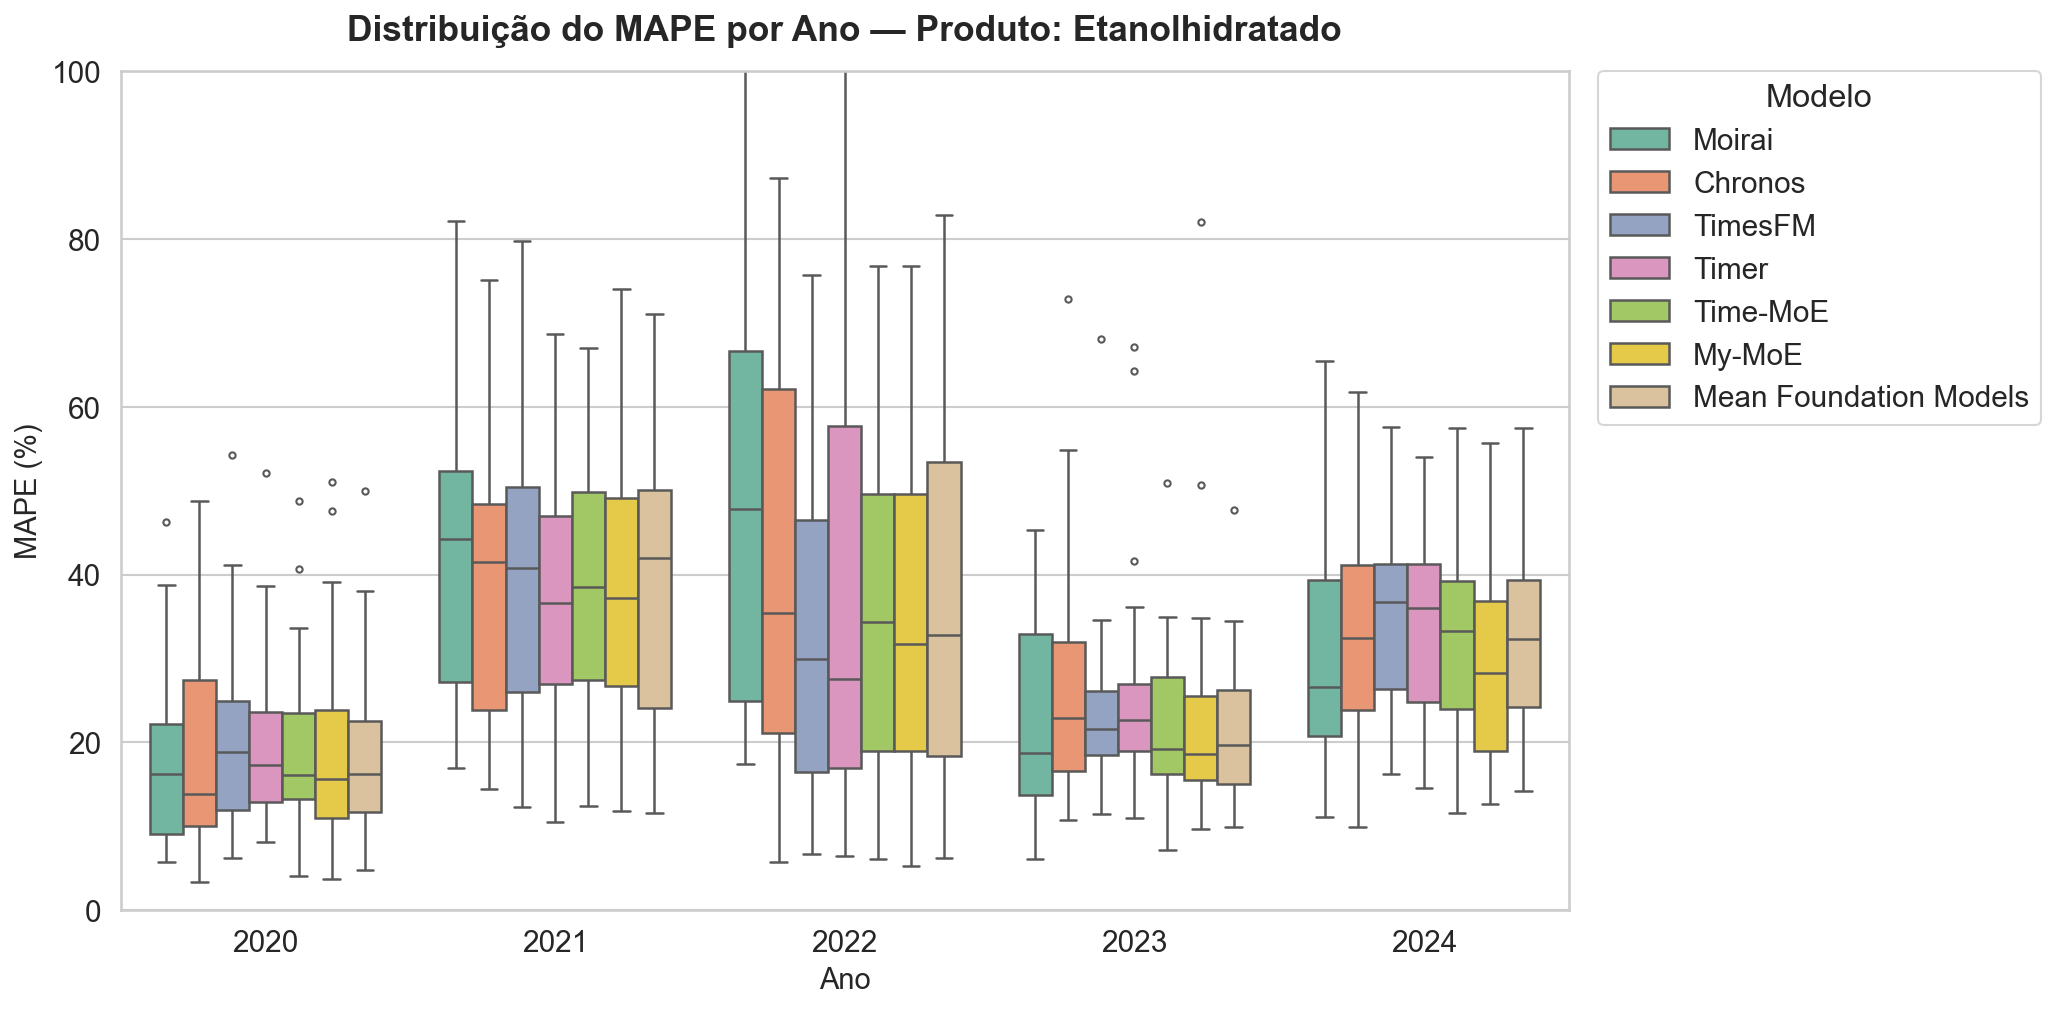

C:\Users\alex-\AppData\Local\Temp\ipykernel_19860\873409688.py:22: UserWarning: The palette list has more values (8) than needed (7), which may not be intended.
  sns.boxplot(


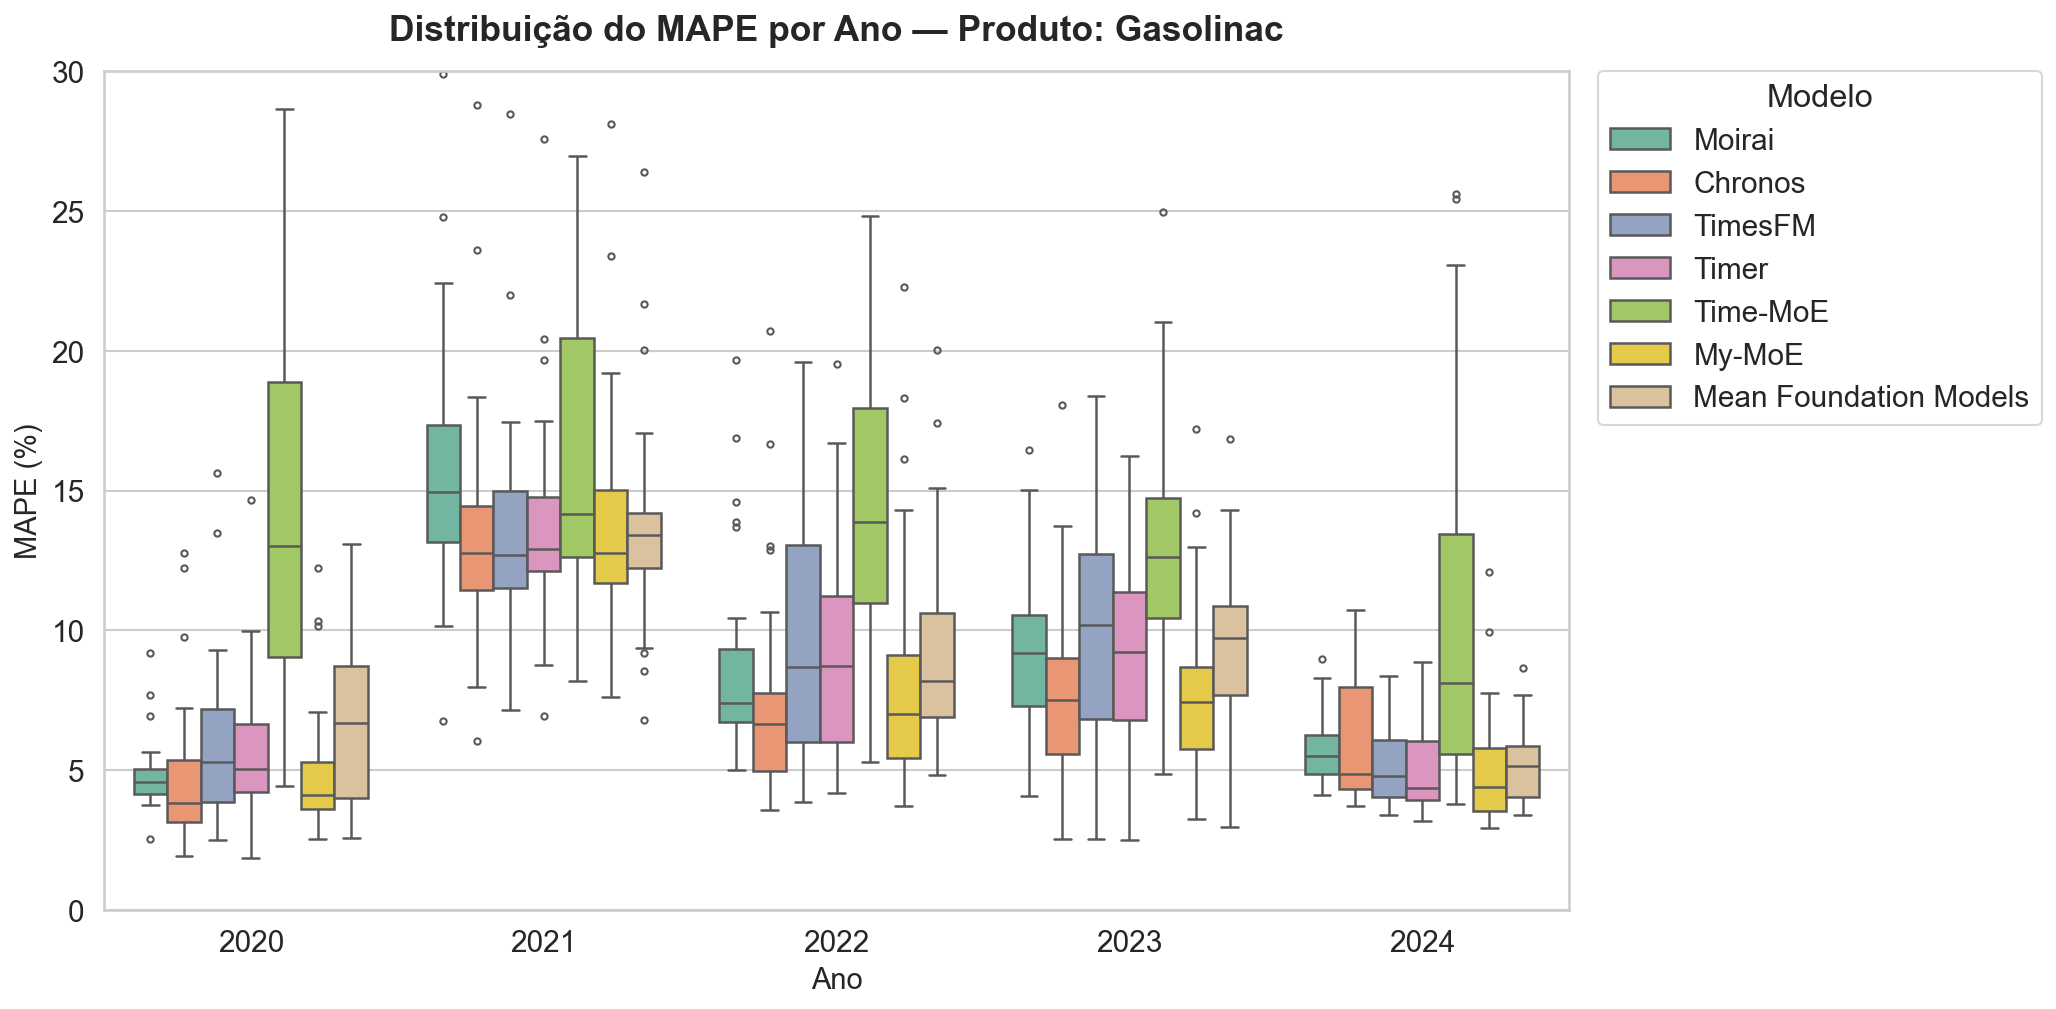

C:\Users\alex-\AppData\Local\Temp\ipykernel_19860\873409688.py:22: UserWarning: The palette list has more values (8) than needed (7), which may not be intended.
  sns.boxplot(


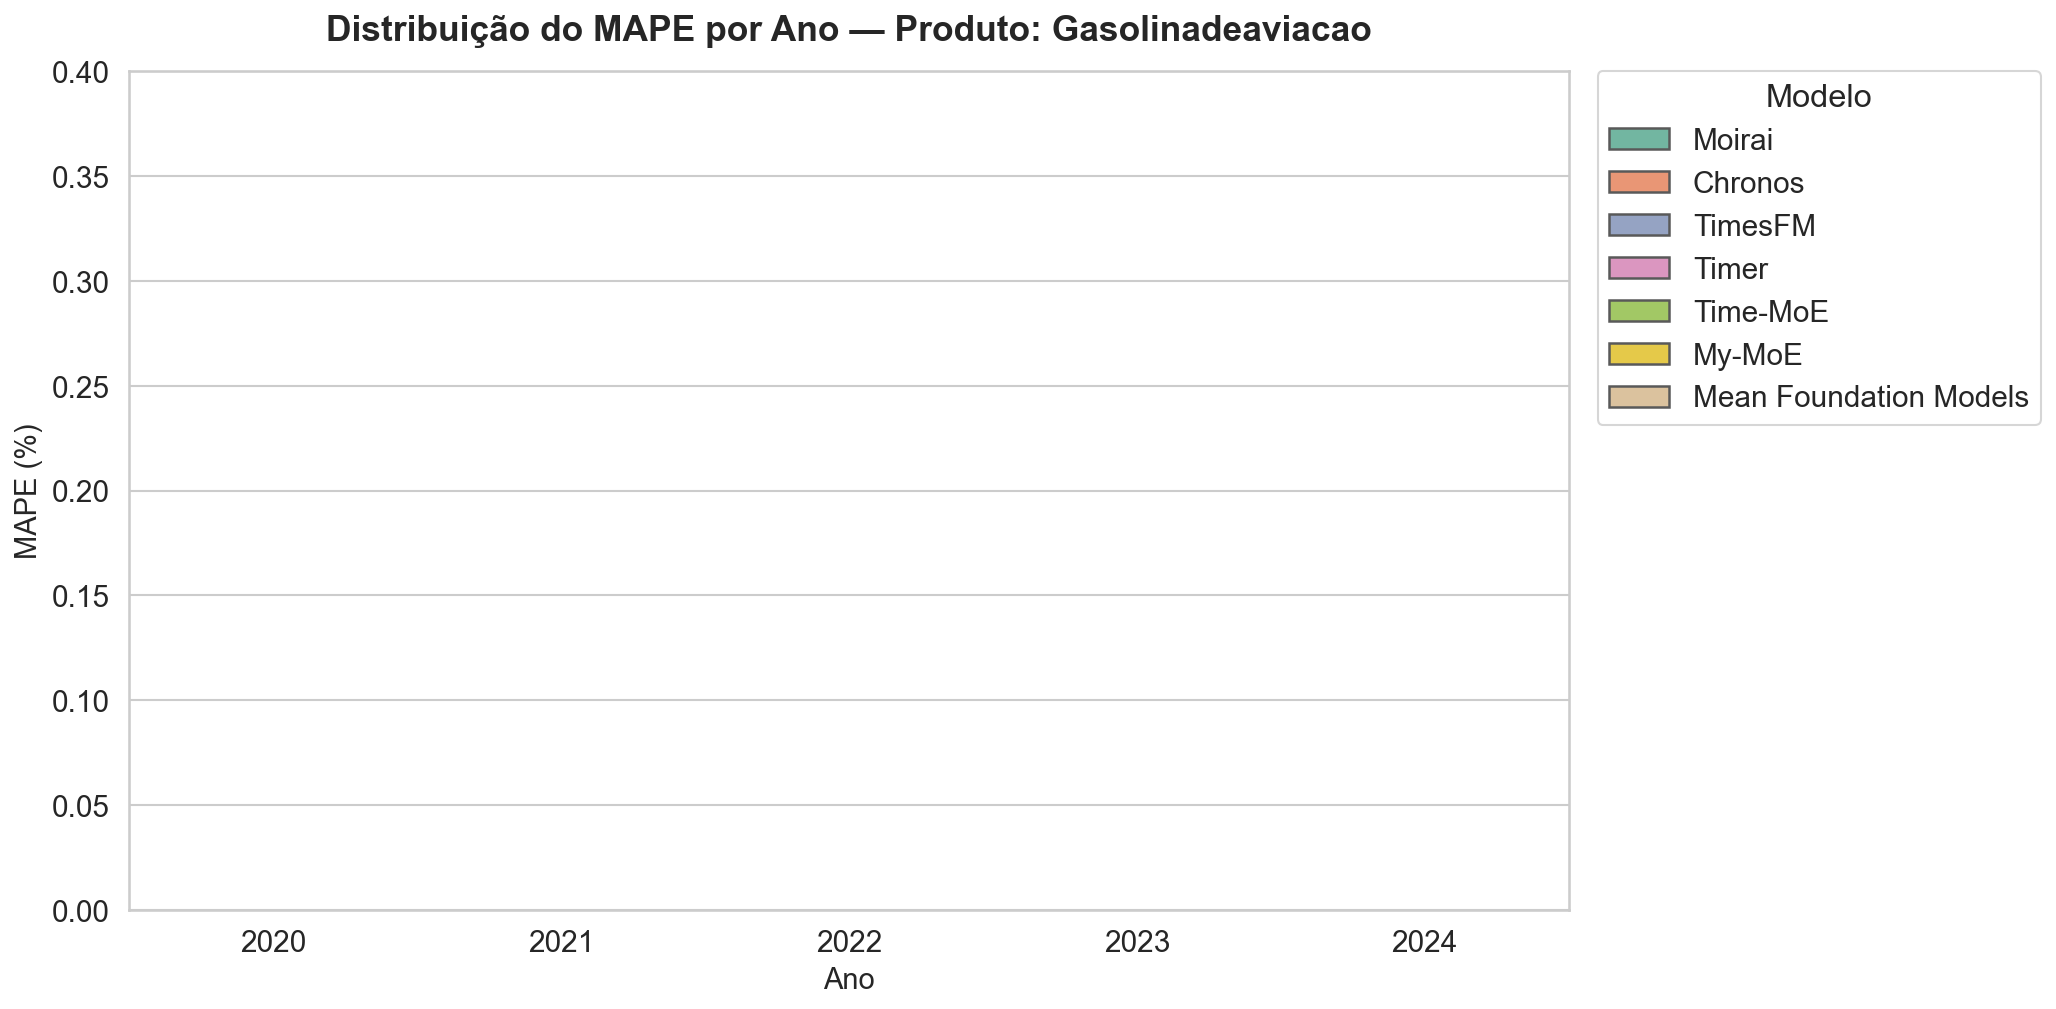

C:\Users\alex-\AppData\Local\Temp\ipykernel_19860\873409688.py:22: UserWarning: The palette list has more values (8) than needed (7), which may not be intended.
  sns.boxplot(


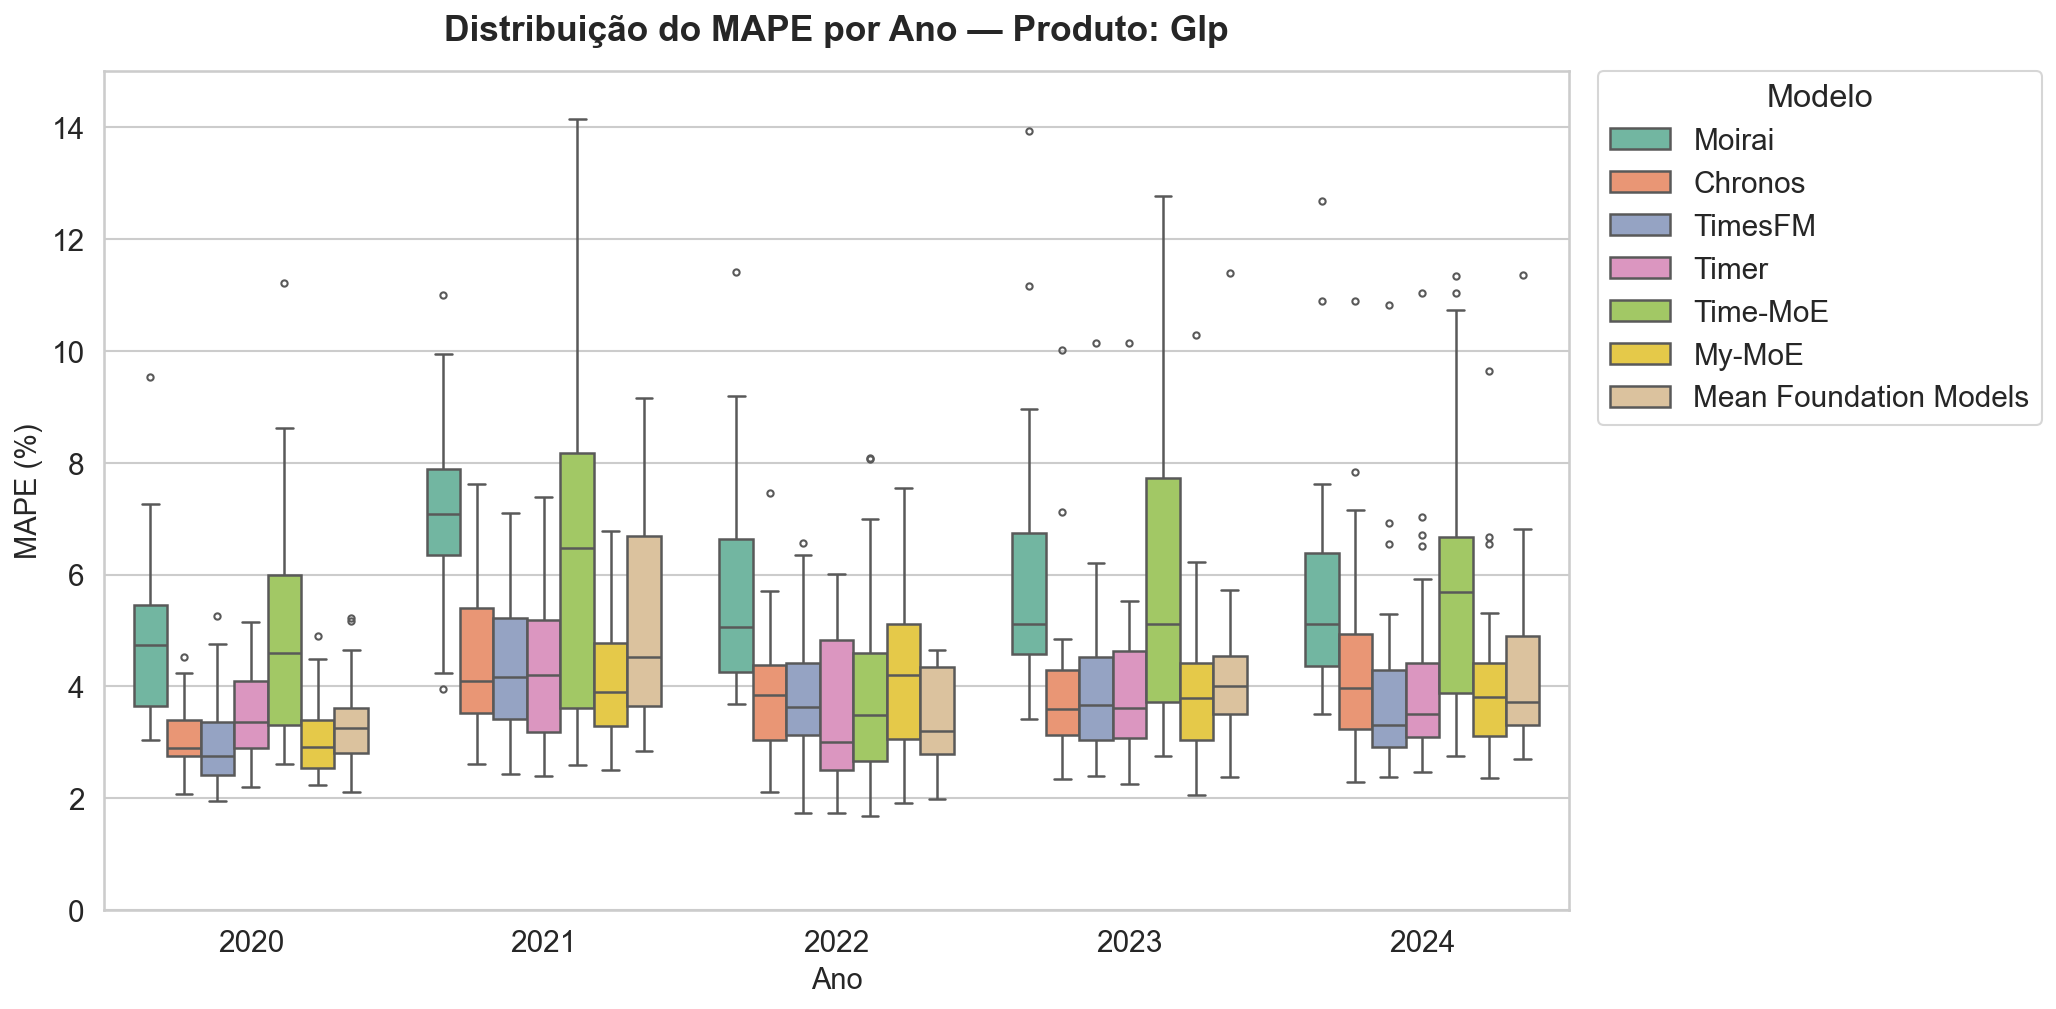

C:\Users\alex-\AppData\Local\Temp\ipykernel_19860\873409688.py:22: UserWarning: The palette list has more values (8) than needed (7), which may not be intended.
  sns.boxplot(


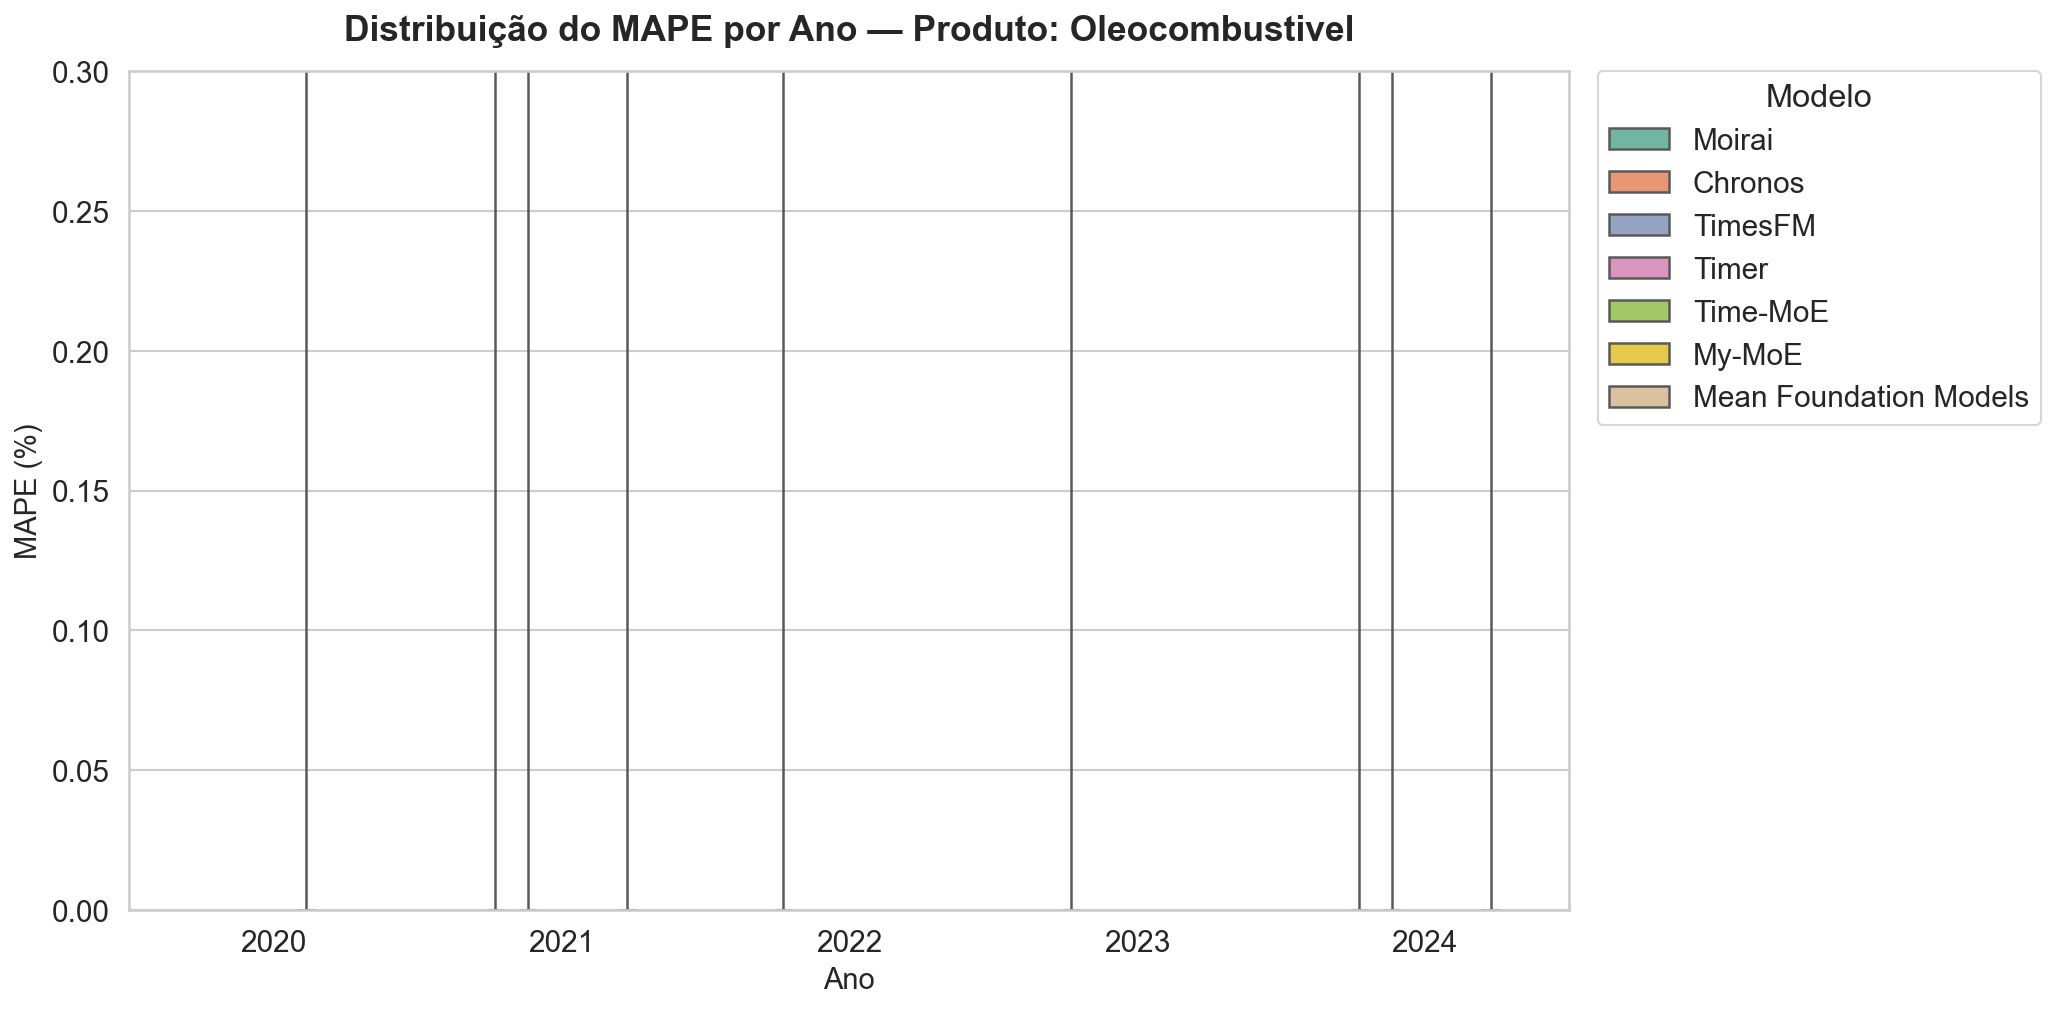

C:\Users\alex-\AppData\Local\Temp\ipykernel_19860\873409688.py:22: UserWarning: The palette list has more values (8) than needed (7), which may not be intended.
  sns.boxplot(


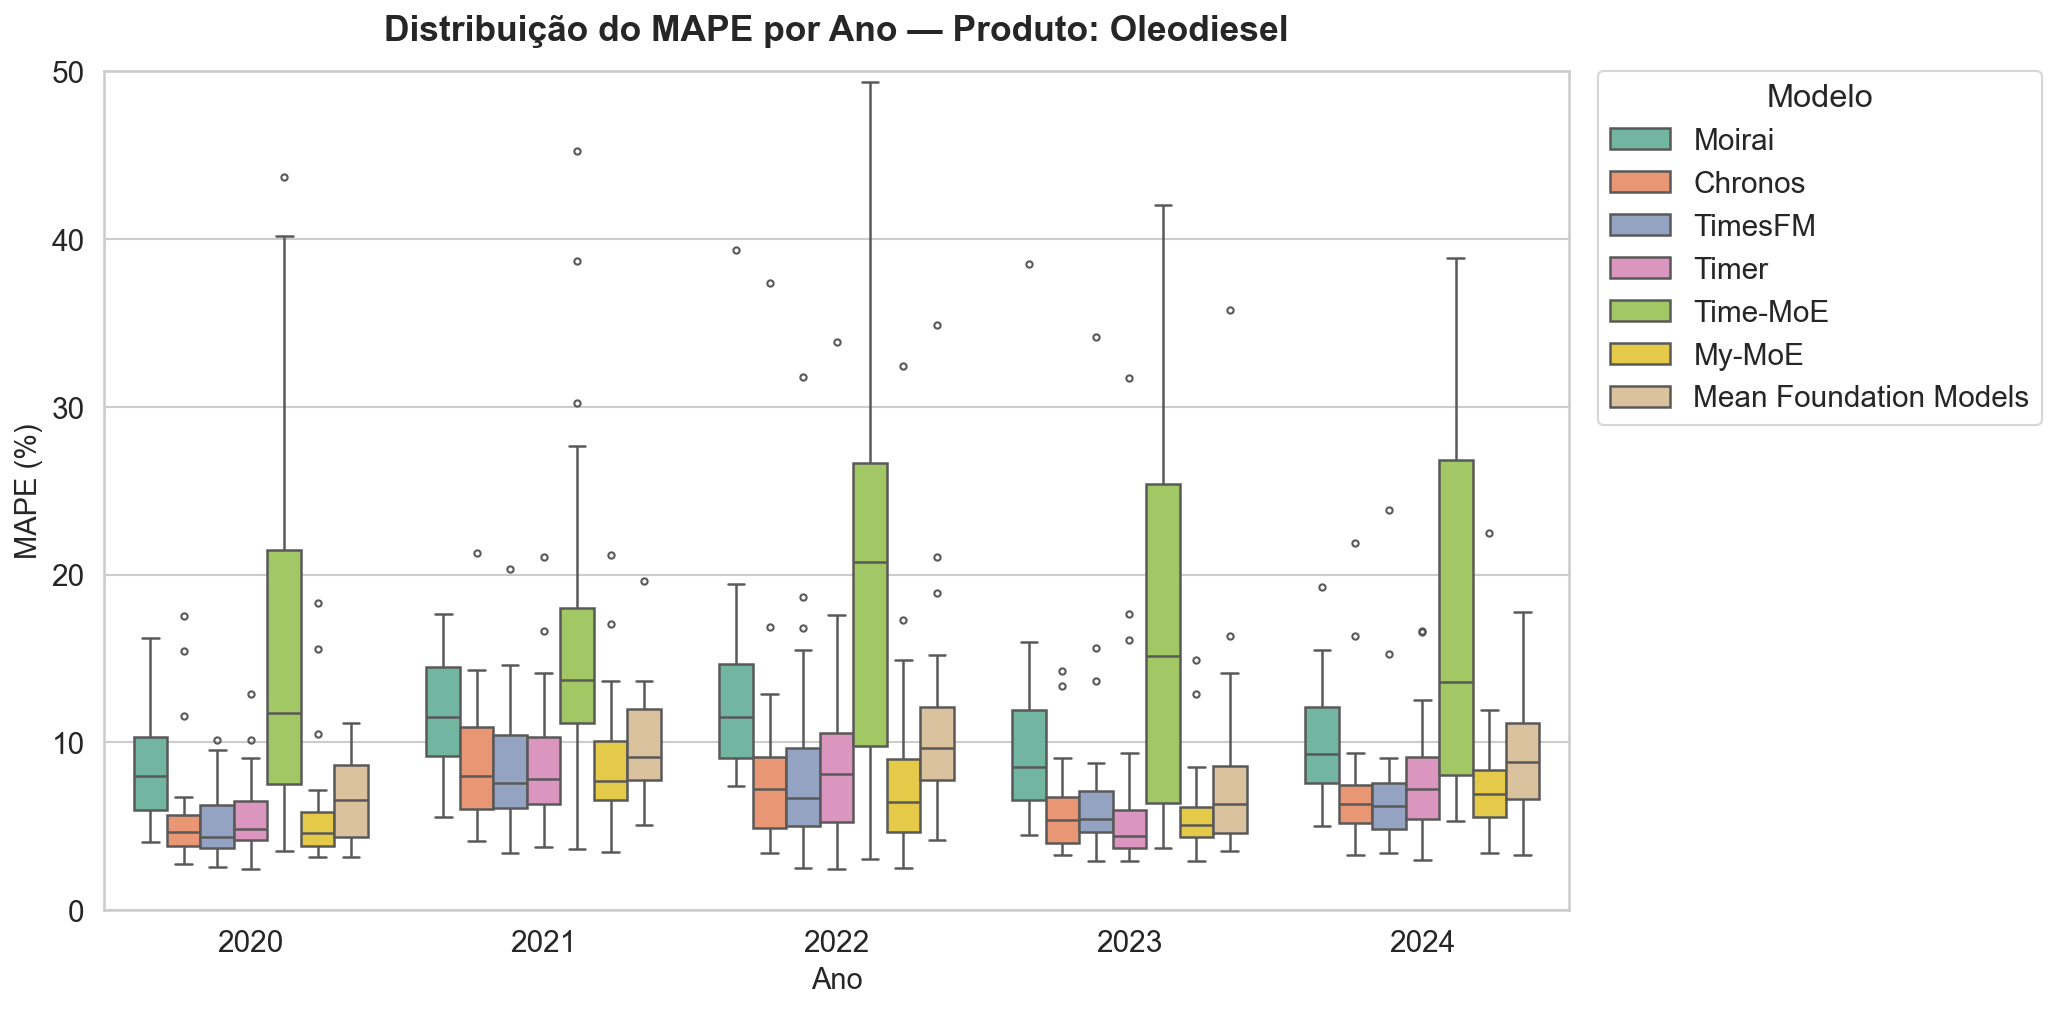

C:\Users\alex-\AppData\Local\Temp\ipykernel_19860\873409688.py:22: UserWarning: The palette list has more values (8) than needed (7), which may not be intended.
  sns.boxplot(


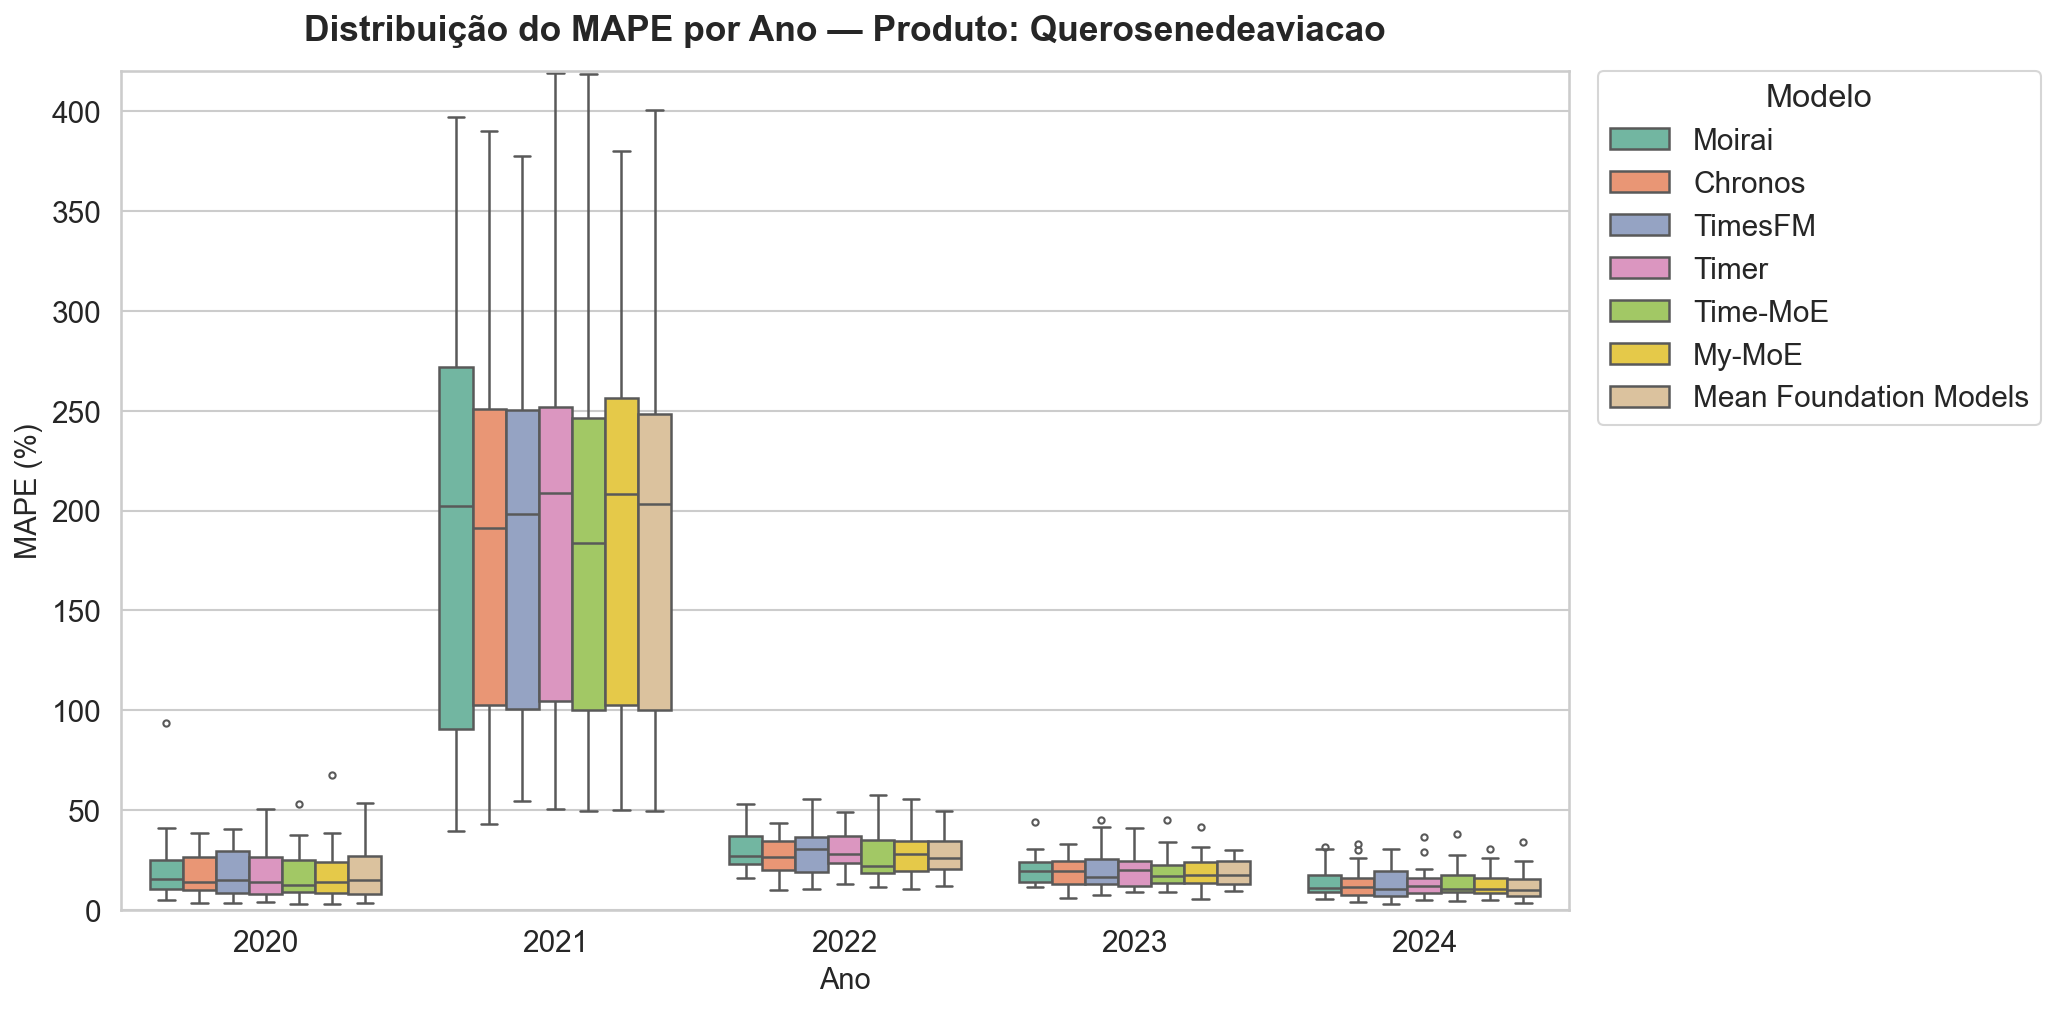

C:\Users\alex-\AppData\Local\Temp\ipykernel_19860\873409688.py:22: UserWarning: The palette list has more values (8) than needed (7), which may not be intended.
  sns.boxplot(


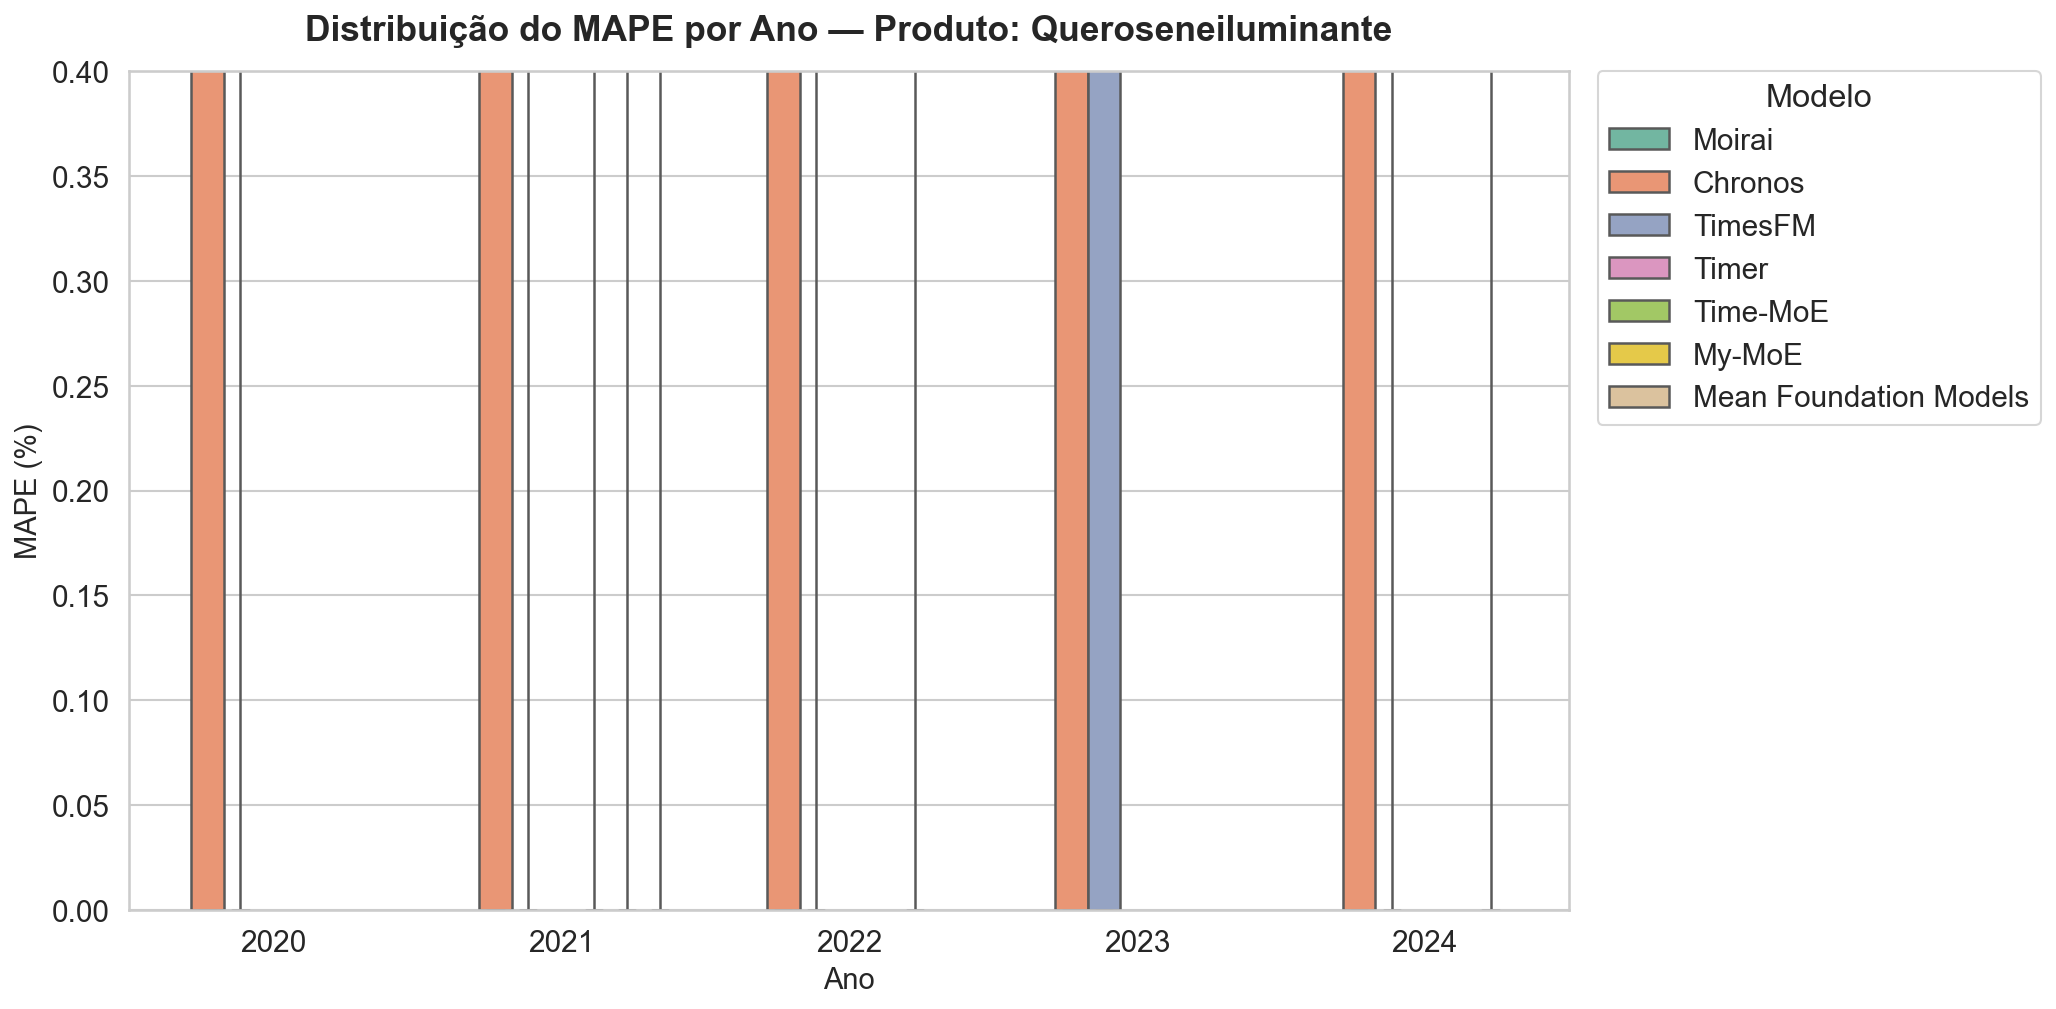

In [10]:
# =========================================
# ==== BOXPLOTS POR PRODUTO (8 GRÁFICOS) ===
# =========================================
unique_products = sorted(df_all["Produto"].unique())

# limites personalizados para cada produto
y_limits = {
    "Etanolhidratado": (0, 100),
    "Gasolinac": (0, 30),
    "Gasolinadeaviacao": (0, 0.4),
    "Glp": (0, 15.0),
    "Oleocombustivel": (0, 0.3),
    "Oleodiesel": (0, 50),
    "Querosenedeaviacao": (0, 420),
    "Queroseneiluminante": (0, 0.4),
}

for prod in unique_products:
    df_prod = df_all[df_all["Produto"] == prod]
    
    fig, ax = plt.subplots(figsize=(14, 7), dpi=150)
    sns.boxplot(
        data=df_prod,
        x="Ano",
        y="MAPE",
        hue="Modelo",
        palette=palette_ano,
        linewidth=1.2,
        fliersize=3,
        ax=ax
    )
    ax.set_title(f"Distribuição do MAPE por Ano — Produto: {prod}", fontsize=17, weight="bold", pad=15)
    ax.set_xlabel("Ano", fontsize=14)
    ax.set_ylabel("MAPE (%)", fontsize=14)
    ax.legend(title="Modelo", bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0.)

    # aplica limite do eixo Y, se existir
    if prod in y_limits:
        ax.set_ylim(y_limits[prod])

    plt.tight_layout()
    plt.show()


In [9]:
import os
import pandas as pd

pasta = "results_by_state_year"
dfs = []

for arquivo in os.listdir(pasta):
    if arquivo.endswith(".csv"):
        caminho = os.path.join(pasta, arquivo)
        df = pd.read_csv(caminho)
        if "Unnamed: 0" in df.columns:
            df = df.drop(columns=["Unnamed: 0"])
        dfs.append(df)

df_total = pd.concat(dfs, ignore_index=True)
df_total["Modelo"] = df_total["Modelo"].astype(str)
df_media = df_total.groupby("Modelo").mean(numeric_only=True).reset_index()
df_media = df_media.round(4)
df_media


,Modelo,Etanolhidratado,Gasolinac,Gasolinadeaviacao,Glp,Oleocombustivel,Oleodiesel,Querosenedeaviacao,Queroseneiluminante
0,Chronos,33.2384,7.9159,6.644943e+17,3.9478,4.964350e+19,8.3578,51.9639,2.286442e+18
1,Mean Foundation Models,32.1371,8.9075,7.481322e+17,4.1071,6.827799e+19,9.6252,52.4737,1.883188e+18
2,Moirai,36.3010,8.8830,8.217024e+17,5.9163,1.206749e+20,11.3643,55.3186,3.190022e+18
3,My-MoE,31.4217,7.9840,7.335053e+17,3.8514,6.058223e+19,8.2853,53.8786,1.039384e+18
4,Time-MoE,32.8490,14.4020,7.776749e+17,5.7863,5.871432e+19,17.5185,52.1862,2.426050e+18
5,Timer,32.6293,8.5557,7.509219e+17,3.9064,6.882761e+19,8.4143,54.4544,2.226968e+18
6,TimesFM,31.3065,8.8420,7.258675e+17,3.8195,4.481334e+19,8.0320,52.7130,3.016025e+17
